# Unity connector example
This notebook showcases how to use the Unity connector to connect to a Unity environment.

In [237]:
import matplotlib.pyplot as plt
import numpy as np

from mlagents_envs.environment import UnityEnvironment
from mlagents_envs.base_env import ActionTuple
# Enable logging messages from Unity
import logging
logging.basicConfig(level=logging.INFO)

%matplotlib inline

### Connecting to Unity

In [271]:
env = UnityEnvironment()
train_mode = True # Whether to run the environment in training or inference mode
env.reset()

[INFO] Listening on port 5004. Start training by pressing the Play button in the Unity Editor.


INFO:mlagents_envs.environment:Listening on port 5004. Start training by pressing the Play button in the Unity Editor.


[INFO] Connected to Unity environment with package version 2.0.1 and communication version 1.5.0


INFO:mlagents_envs.environment:Connected to Unity environment with package version 2.0.1 and communication version 1.5.0


[INFO] Connected new brain: CarBehaviour?team=0


INFO:mlagents_envs.environment:Connected new brain: CarBehaviour?team=0


In [252]:
behavior_name = list(env.behavior_specs)[0]
print(f"Name of the behavior : {behavior_name}")
spec = env.behavior_specs[behavior_name]


Name of the behavior : CarBehaviour?team=0


### Looking at the agent's observations

In [245]:
# Examine the number of observations per Agent
print("Number of observations : ", len(spec.observation_specs))

# Is there a visual observation ?
# Visual observation have 3 dimensions: Height, Width and number of channels
vis_obs = any(len(spec.shape) == 3 for spec in spec.observation_specs)
print("Is there a visual observation ?", vis_obs)

Number of observations :  9
Is there a visual observation ? True


In [253]:
decision_steps, terminal_steps = env.get_steps(behavior_name)

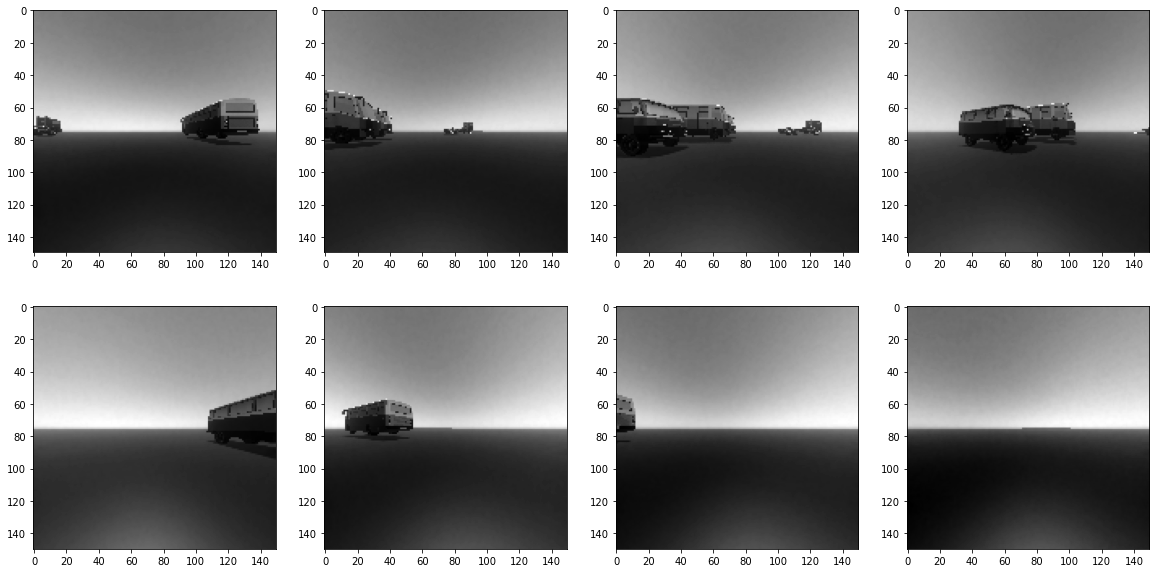

In [272]:
for index, obs_spec in enumerate(spec.observation_specs):
        
    if len(obs_spec.shape) == 3:
        # Create subplot
        plt.subplot(2, 4, index + 1)

        # Set subplot figsize
        plt.gcf().set_size_inches(20, 10)

        image = decision_steps.obs[index][0,:,:,:]
        plt.imshow(image, cmap='gray')

### Stepping the environment

In [273]:
input_array = np.array([1, 1, 0])

for i in range(200):
    # Create continiuous action tuple
    action = ActionTuple(np.array([input_array], dtype=np.float32))

    # Set the actions
    env.set_actions(behavior_name, action)
    #env.get_steps(behavior_name)

    # Move the simulation forward
    env.step()

In [270]:
env.close()